# 밀레니얼 분석 =========== 여기에서 20~30이 곧 밀레니얼이라고 가정해서하자

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('bank-additional-full.csv',sep=';')
original_df = df.copy()
# Have a grasp of how our data looks.
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

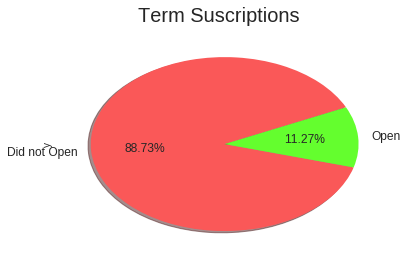

In [84]:
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open", "Open"
plt.suptitle('Term Suscriptions', fontsize=20)
df['y'].value_counts().plot(kind="pie",autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)
plt.show()

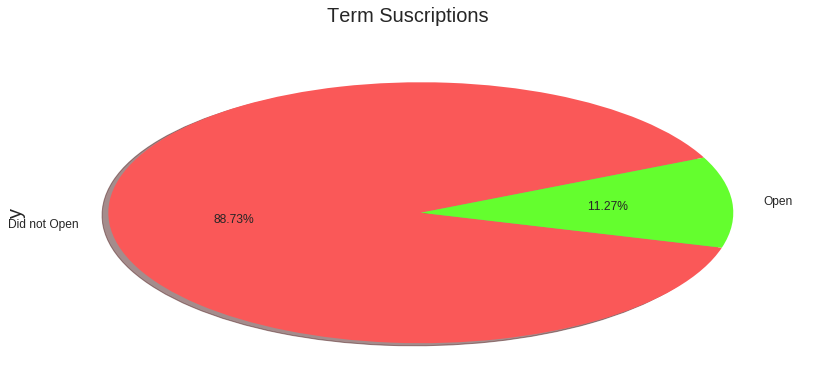

In [553]:
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open", "Open"
plt.suptitle('Term Suscriptions', fontsize=20)
df['y'].value_counts().plot(kind="pie",autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)
plt.show()

### numeric view

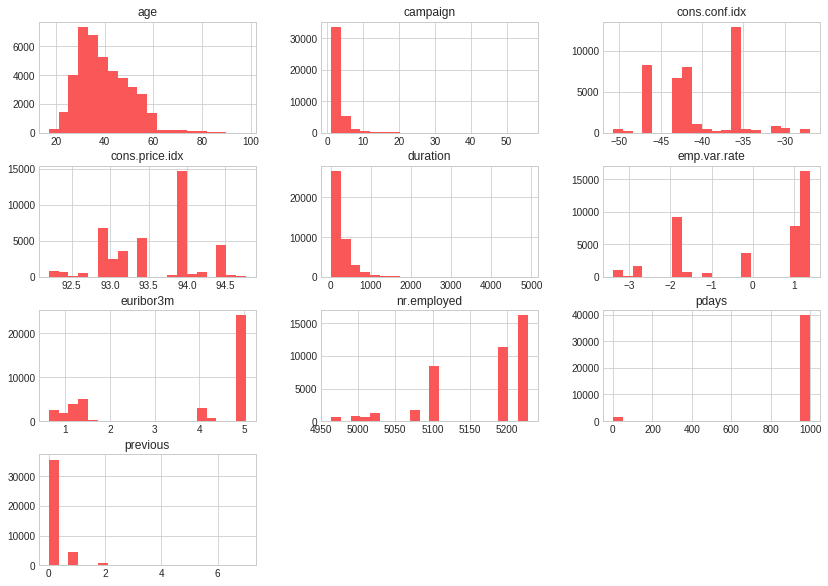

In [97]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color="#FA5858")
plt.show()

### category view

In [571]:
def cate_plot(x,df):
    plt.rcParams['figure.figsize'] = (20, 6)
    plt.suptitle(x, fontsize=10)
    sns.countplot(x=x, data=df,stacked=True);

In [426]:
    def ratio_plot(x,df):
        aa = (df[df['y']=='yes'][x].value_counts())/df[x].value_counts()
        plt.suptitle('ratio '+ x +' (%)', fontsize = 20)
        aa.plot(kind='bar',stacked=True)

### 정규화된 분포 및 양의 주파수와 음의 주파수 간의 차이--> 긍정적인 가치는 이 범주가 구독할 고객을 선호하고 제품을 구매하지 않는 고객을 선호한다는 것을 의미

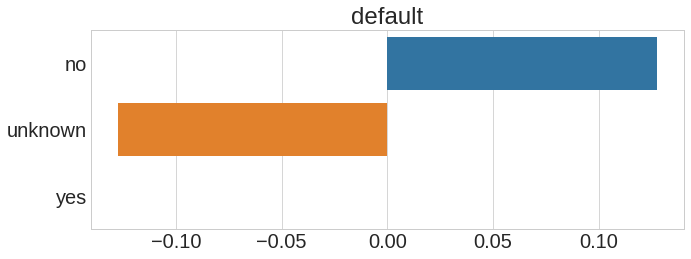

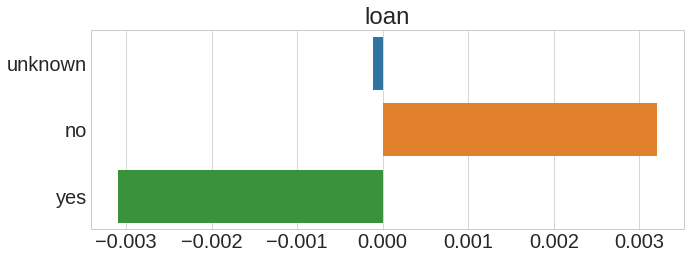

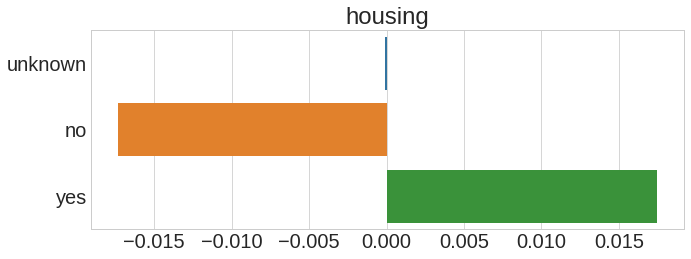

In [603]:
categorical = [ 'default', 'loan', 'housing']
for col in categorical:
    plt.figure(figsize=(10,4))
    
    pos = df.loc[df.y.values == 'yes', col].value_counts() 
    neg = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos.index) + list(neg.index)))
    
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos = pos.to_dict()
    neg = neg.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos.get(k, 0) / freq_pos - neg.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

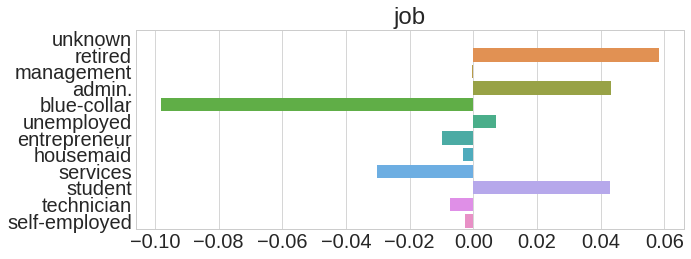

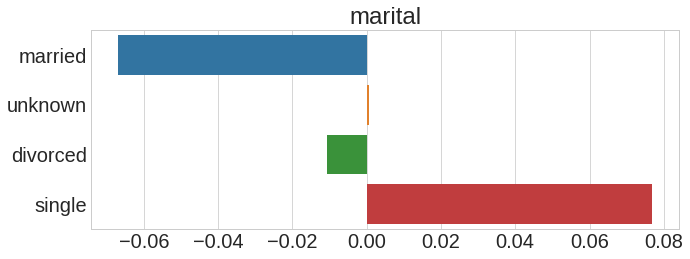

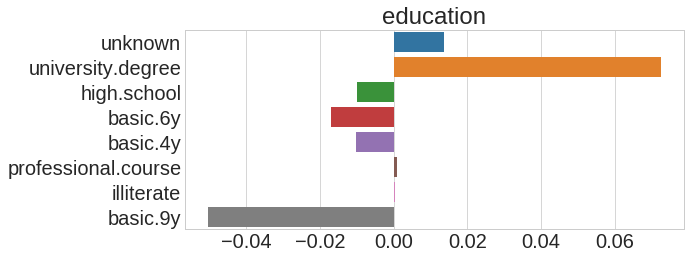

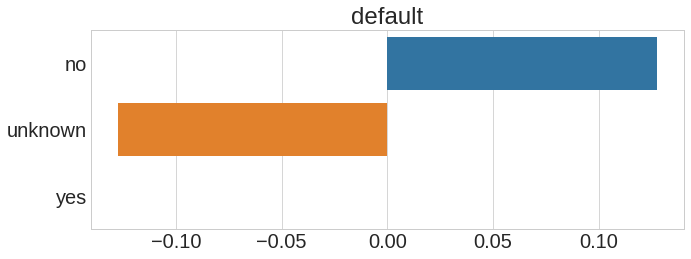

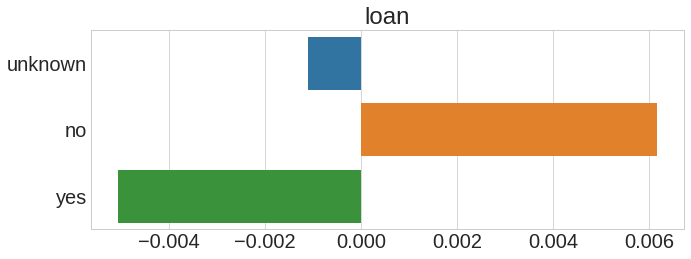

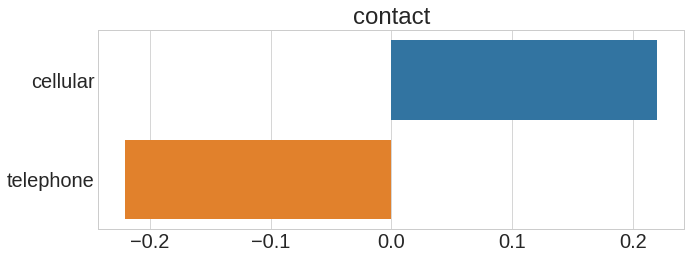

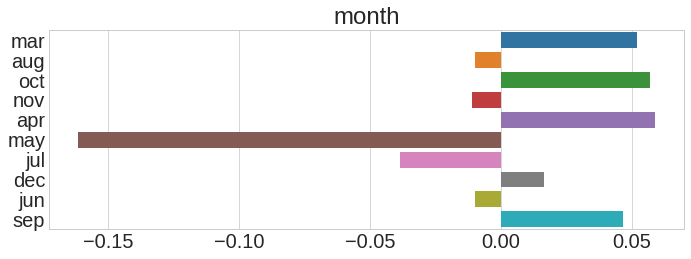

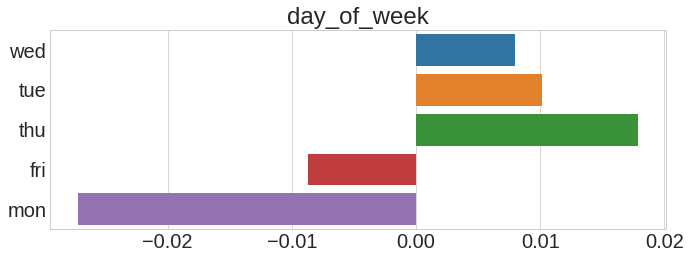

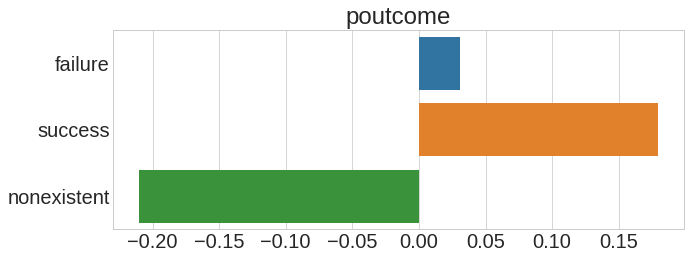

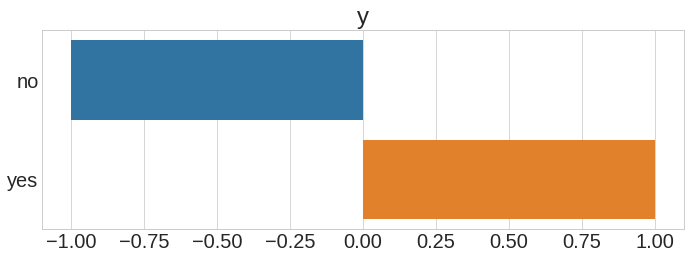

In [430]:
categorical = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorical:
    plt.figure(figsize=(10,4))
    
    pos = df.loc[df.y.values == 'yes', col].value_counts() 
    neg = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos.index) + list(neg.index)))
    
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos = pos.to_dict()
    neg = neg.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos.get(k, 0) / freq_pos - neg.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

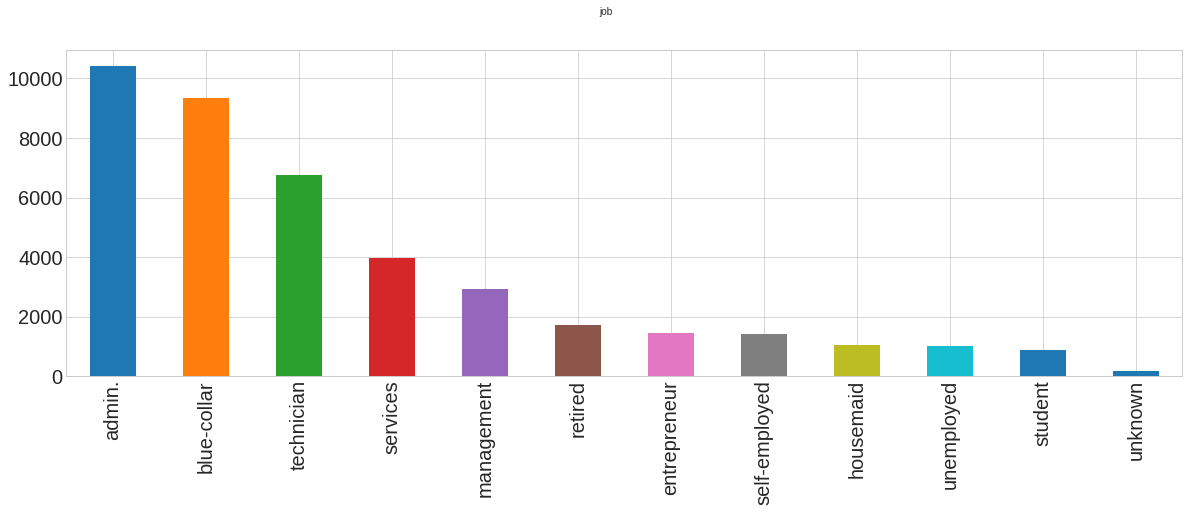

In [570]:
cate_plot('job',df)

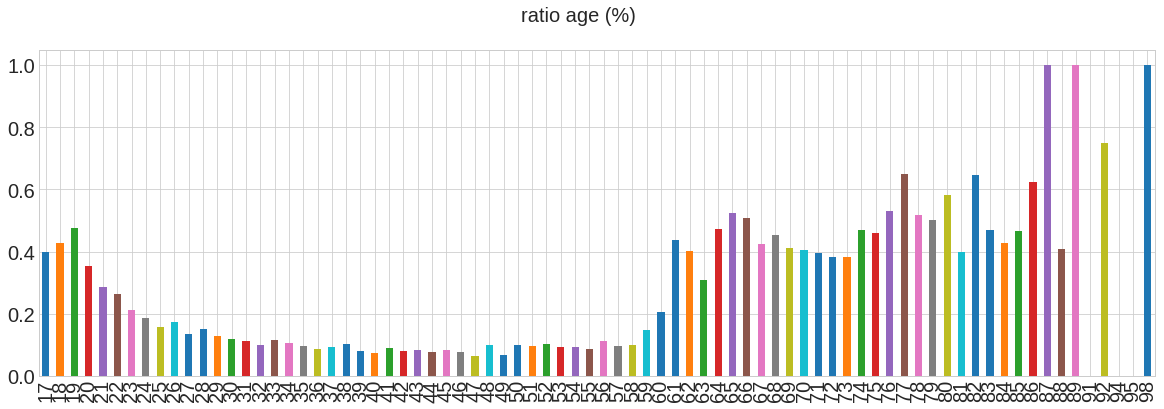

In [602]:
ratio_plot('age',df)

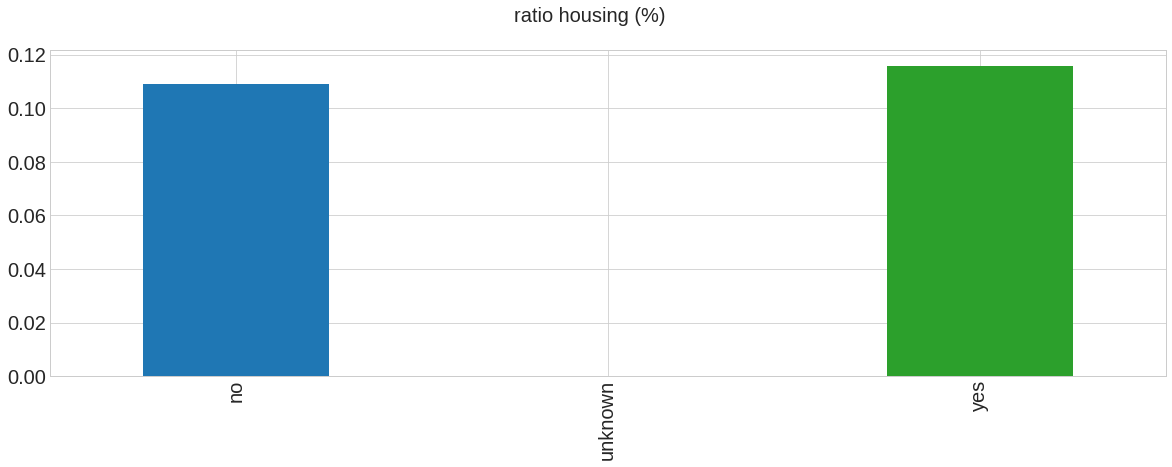

In [604]:
ratio_plot('housing',df)

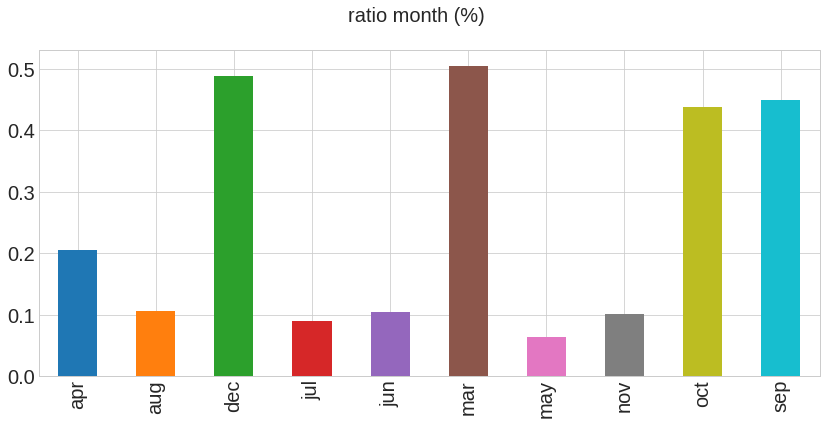

In [499]:
ratio_plot('month',df)

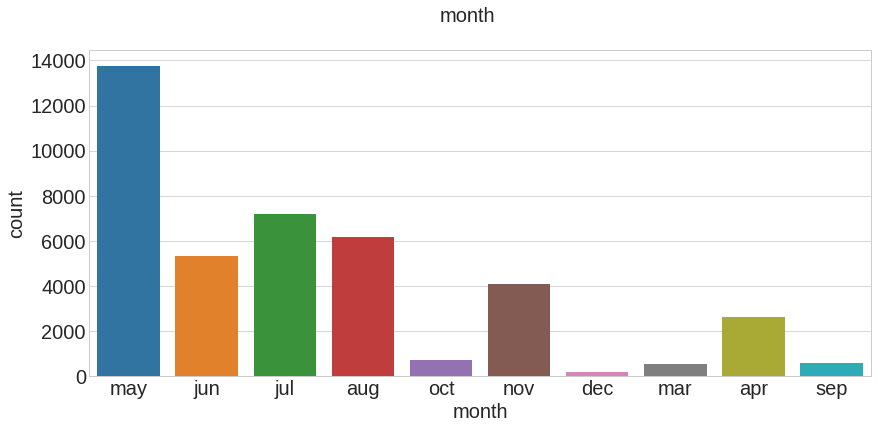

In [498]:
cate_plot('month',df)

In [501]:
df_months = pd.crosstab(index=df['month'],columns=df['y'])
df_months['percentage(yes)'] = (df_months['yes'] / (df_months['yes'] + df_months['no'])) * 100
df_months

y,no,yes,percentage(yes)
month,,,
apr,2093,539,20.478723
aug,5523,655,10.602137
dec,93,89,48.901099
jul,6525,649,9.046557
jun,4759,559,10.511470
mar,270,276,50.549451
may,12883,886,6.434745
nov,3685,416,10.143867
oct,403,315,43.871866


# 5,6,7,8 월이 가장 보통 많은 Contact이 있었지만 실제 비율은 그것에 비례하지않고 3,9,10,12월에 비례

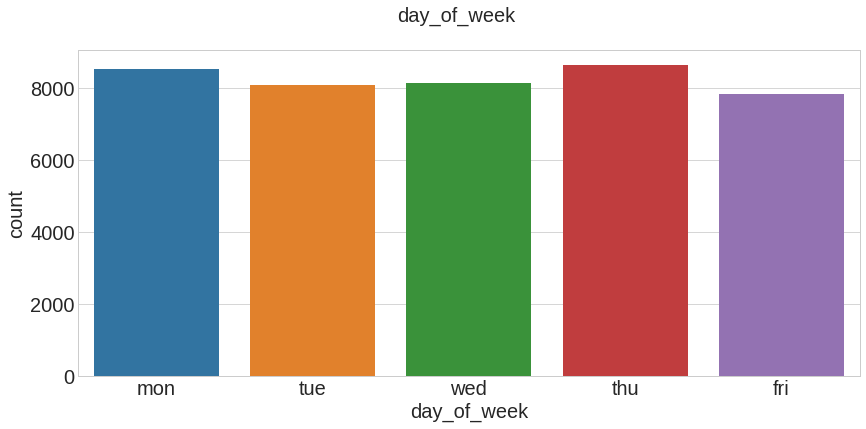

In [502]:
cate_plot('day_of_week',df)

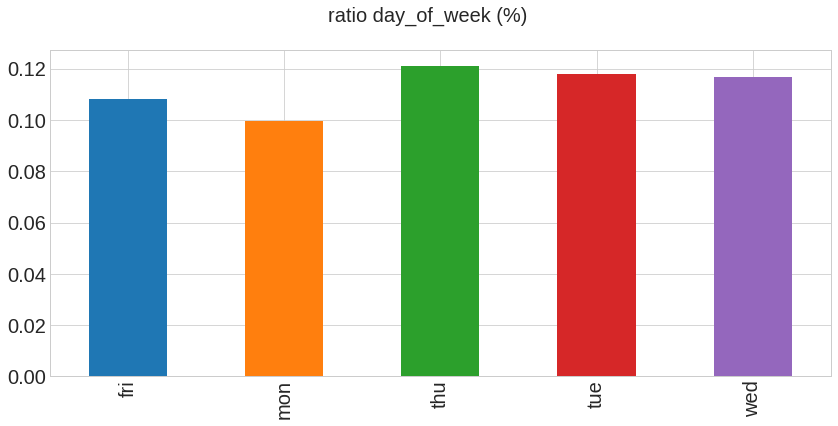

In [503]:
ratio_plot('day_of_week',df)

# 요일별로는 일정합니다.

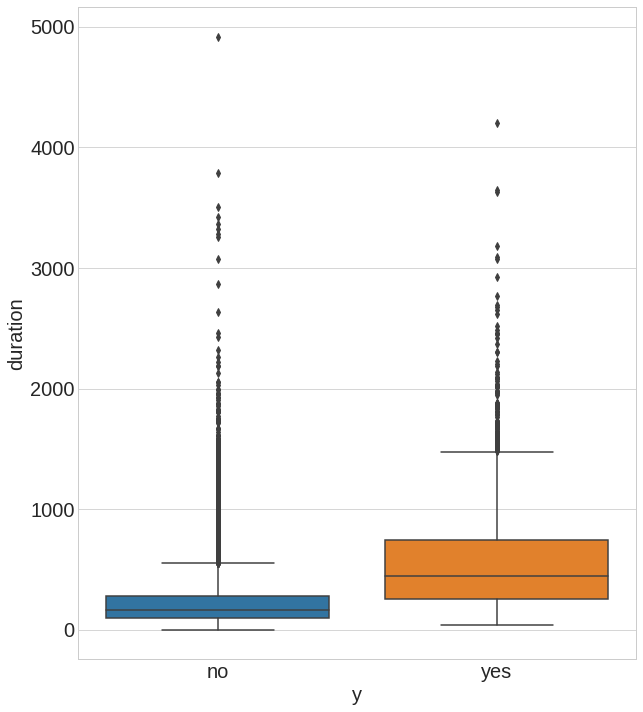

In [504]:
new_data = df[df['duration'] != 0]
#Let's see if there is still any trend in coversion based on duration after removing duration = 0, data points
plt.figure(figsize=(10,12))
sns.boxplot(x='y',y='duration',data=new_data)
plt.show()

# 대부분의 통화 지속 시간은 0~200초 사이입니다.기간이 300초를 넘으면 가입자가 늘어날 가능성을 보여주는 명확한 추세이다.

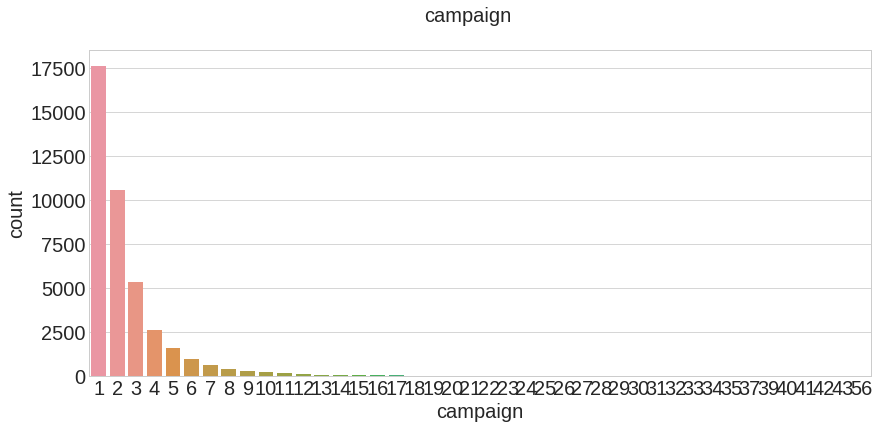

In [507]:
cate_plot('campaign',df)

Text(0.5,1,'ratio')

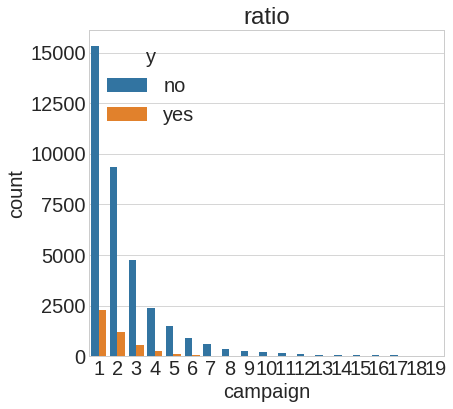

In [514]:

camp_less_than_20 = df[df['campaign'] < 20]
plt.subplot(1,2,2)
sns.countplot(x="campaign", hue="y", data=camp_less_than_20);

plt.title('ratio')

In [512]:
camp_less_than_20 = df[df['campaign'] < 20]
df_campaign = pd.crosstab(index=camp_less_than_20['campaign'],columns=camp_less_than_20['y'])
df_campaign['percentage(yes)'] = (df_campaign['yes'] / (df_campaign['yes'] + df_campaign['no'])) * 100
df_campaign

y,no,yes,percentage(yes)
campaign,,,
1,15342,2300,13.037071
2,9359,1211,11.456954
3,4767,574,10.747051
4,2402,249,9.392682
5,1479,120,7.504690
6,904,75,7.660878
7,591,38,6.041335
8,383,17,4.250000
9,266,17,6.007067


# 캠페인 기간 동안 한 사람에게 수행된 통화 수는 평균 0-10개입니다.비록 대부분의 사람들이 캠페인 기간 동안 첫 번째 전화를 구독하고 있지만, 그들의 비율 전환은 매우 낮습니다. 17K 구독 중 2k입니다. 전환 비율이 2에서 5 사이입니다. 만약 어떤 사람이 10번 이상 연락을 받는다면, 그 신호는 그가 구독하지 않을 것이라는 것을 매우 명확하게 한다.

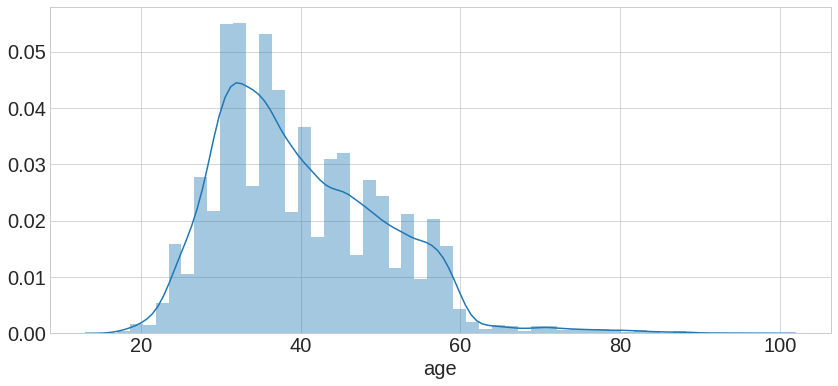

In [515]:

sns.distplot(df['age'])
plt.show()

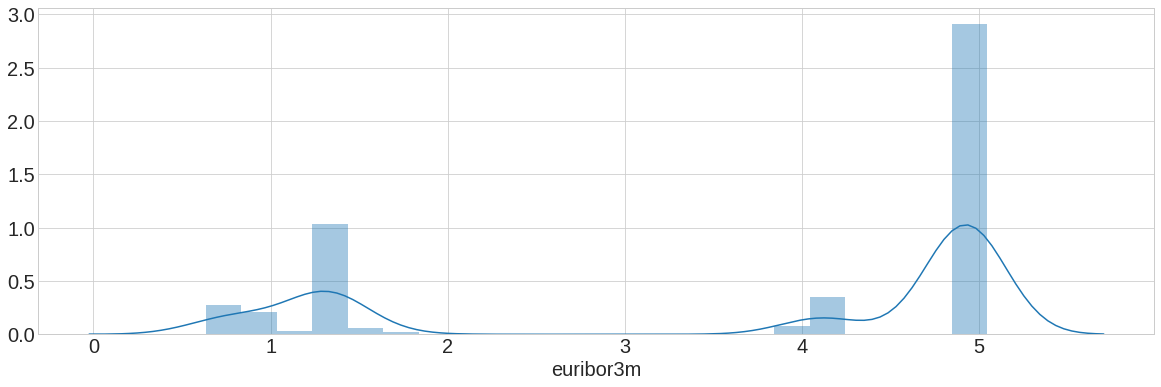

In [575]:
sns.distplot(df['euribor3m'])
plt.show()

In [579]:
df['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

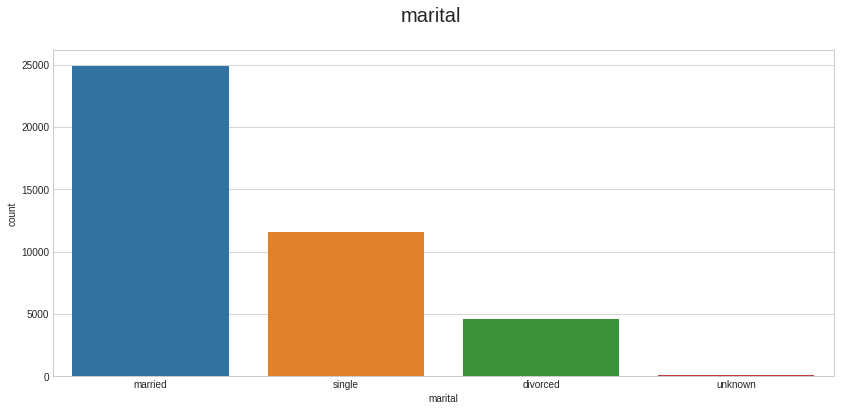

In [103]:
cate_plot('marital')

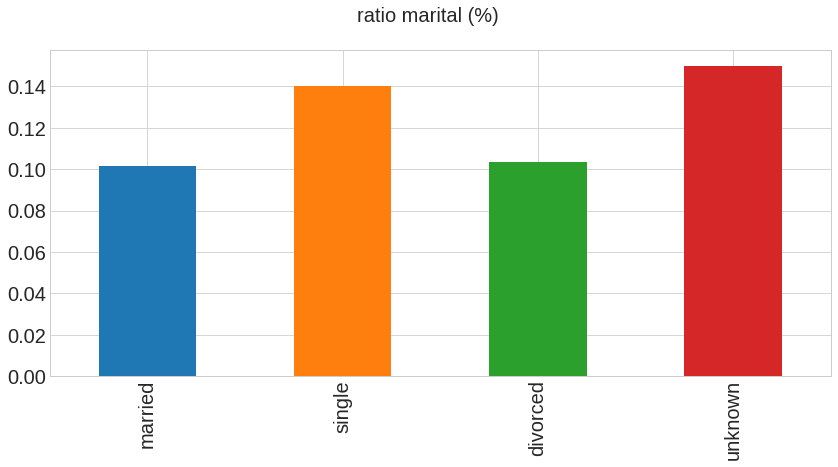

In [516]:
ratio_plot('marital',df)

# UNKNOWN 처리필요

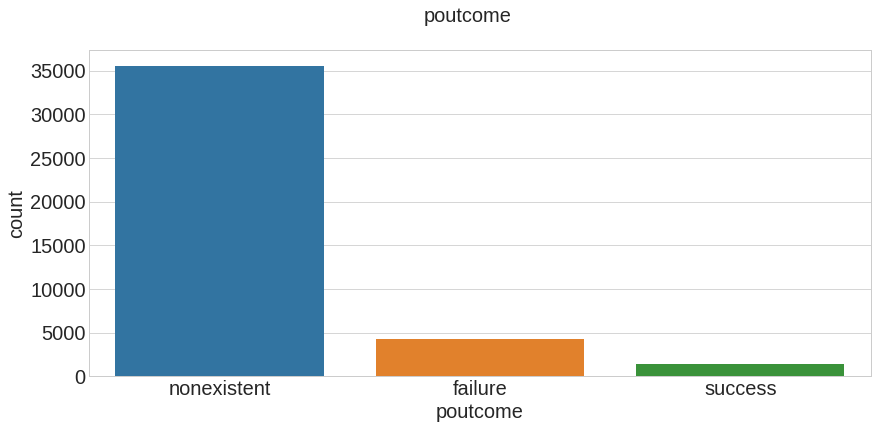

In [518]:
cate_plot('poutcome',df)

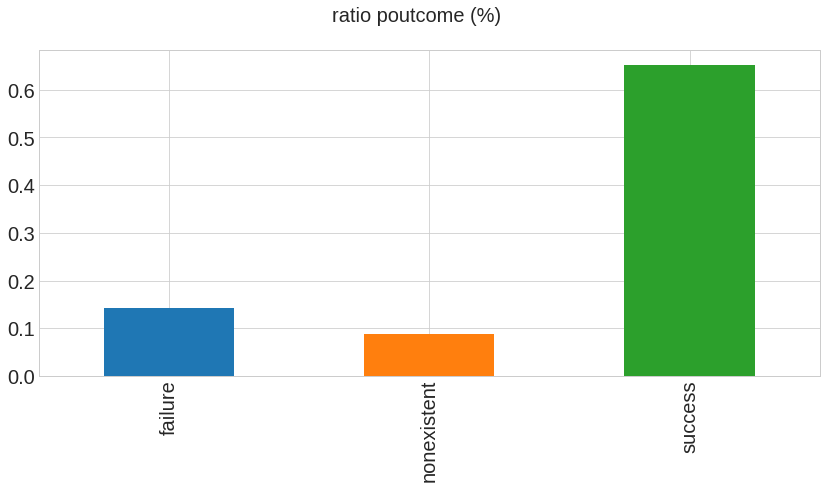

In [520]:
ratio_plot('poutcome',df)

# 이는 상당한 시사점을준다 우리는 이전 캠페인에서 거절을 한 사람들이 있지만 우리는 여전히 그들 중 14%을 설득하고 있다고 말할 수 있다.

In [521]:
df_outcome = pd.crosstab(index=df['poutcome'],columns=df['y'])
df_outcome['percentage(yes)'] = (df_outcome['yes'] / (df_outcome['yes'] + df_outcome['no'])) * 100
df_outcome

y,no,yes,percentage(yes)
poutcome,,,
failure,3647,605,14.228598
nonexistent,32422,3141,8.832213
success,479,894,65.112891


AttributeError: Unknown property stacked

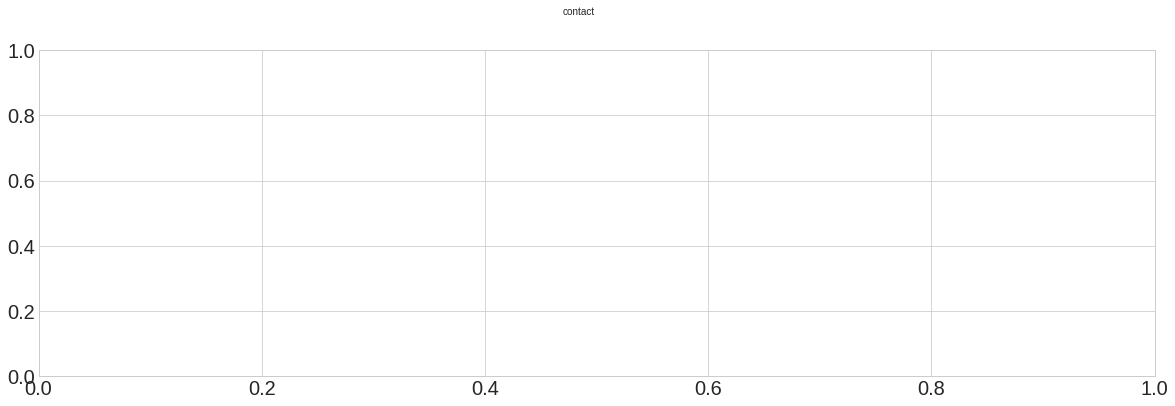

In [601]:
cate_plot('contact',df)

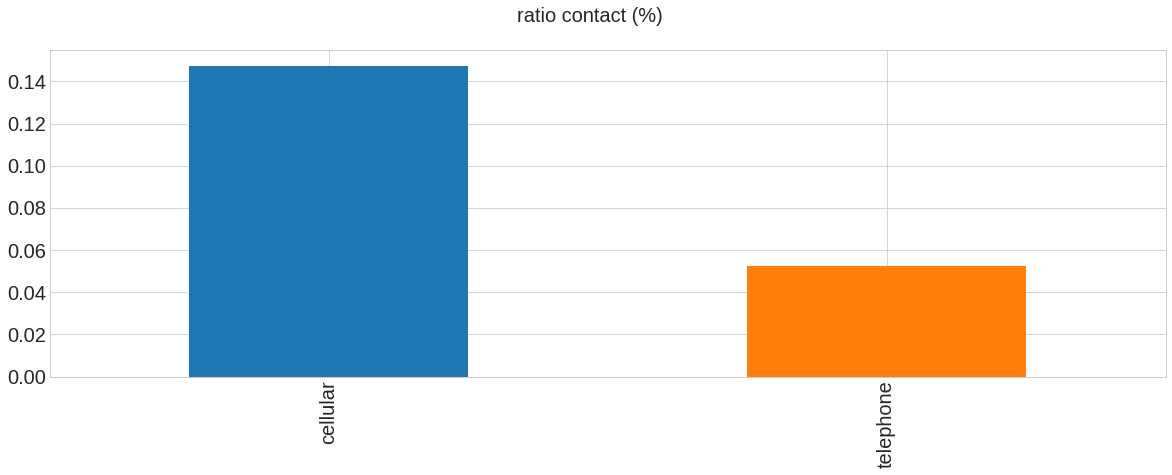

In [580]:
ratio_plot('contact',df)

# 다음 캠페인에서는 전환률이 훨씬 높기 때문에 (둘 다 있다면) 사람들에게 전화를 거는 것이 더 이치에 맞다.

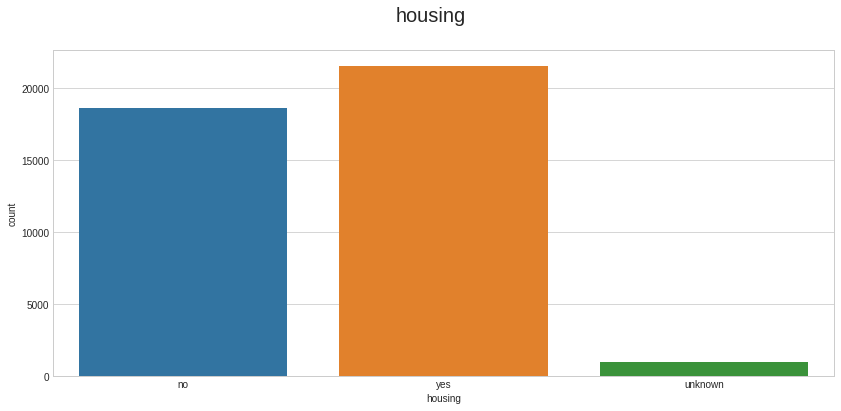

In [106]:
cate_plot('housing')

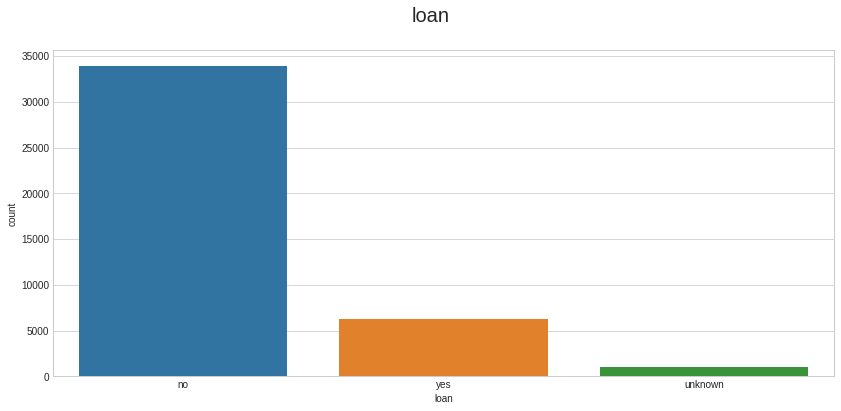

In [107]:
cate_plot('loan')

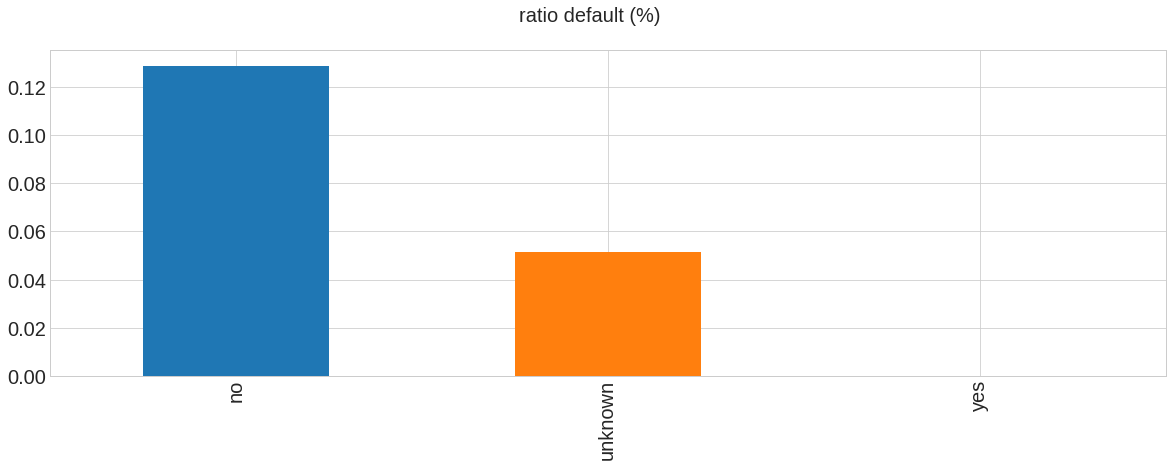

In [572]:
ratio_plot('default',df)

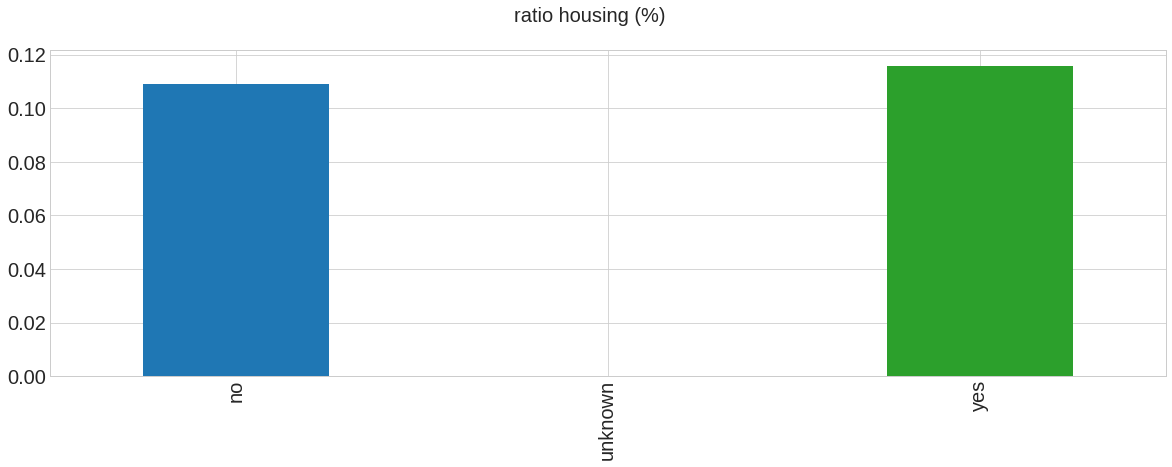

In [573]:
ratio_plot('housing',df)

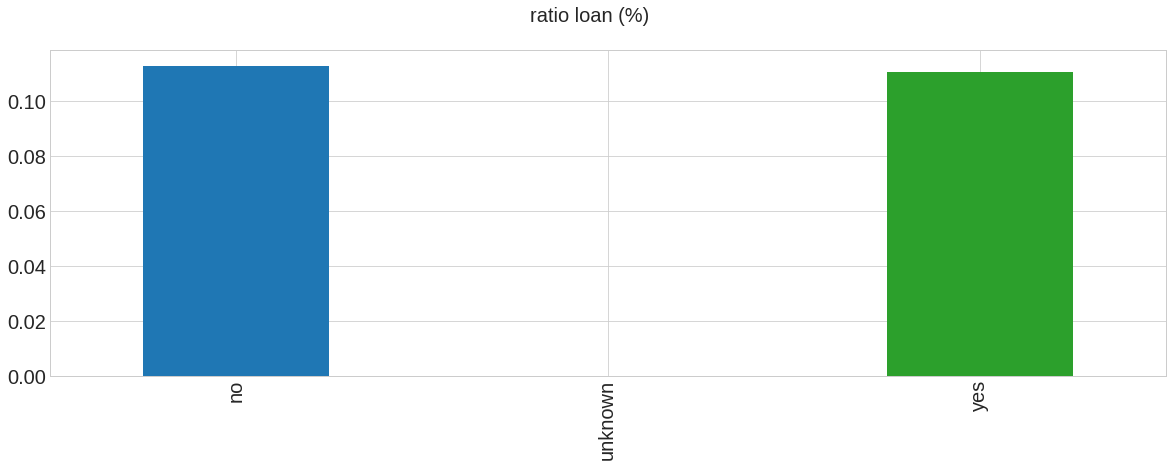

In [574]:
ratio_plot('loan',df)

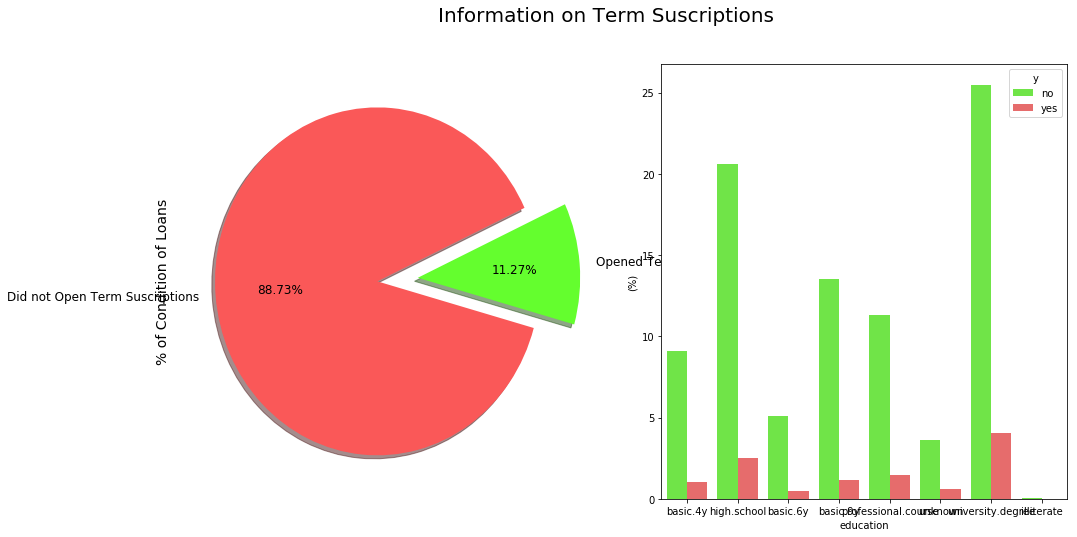

In [63]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="age", hue="y", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

## train & test split

In [89]:
labels = df["y"].copy()
data   = df.drop("y",axis=1)
train, test, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=1000)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
dtypes: float64(5), int64(5), object(10)
memory usage: 6.3+ MB


In [91]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### MissingData

In [93]:
print(sum(data.job == 'unknown')
,sum(data.marital == 'unknown')
,sum(data.education == 'unknown')
,sum(data.default == 'unknown')
,sum(data.housing == 'unknown')
,sum(data.loan == 'unknown'))

330 80 1731 8597 990 990


In [94]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


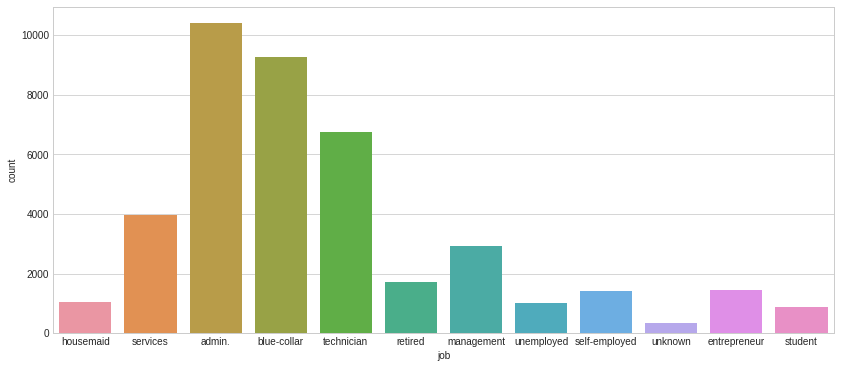

In [95]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(x='job', data=data);

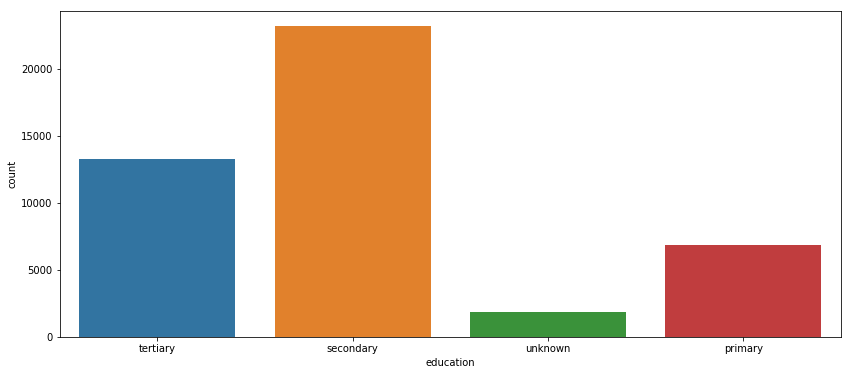

In [41]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(x='education', data=data);

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [22]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

## Model

### client info

In [454]:
df_client = df.iloc[: , 0:7]
df_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [455]:
# Quartiles
print('1 Quartile: ', df_client['age'].quantile(q = 0.25))
print('2 Quartile: ', df_client['age'].quantile(q = 0.50))
print('3 Quartile: ', df_client['age'].quantile(q = 0.75))
print('4 Quartile: ', df_client['age'].quantile(q = 1.00))

print('Ages above: ', df_client['age'].quantile(q = 0.75) + 
                      1.5*(df_client['age'].quantile(q = 0.75) - df_client['age'].quantile(q = 0.25)), 'are outliers')

1 Quartile:  32.0
2 Quartile:  38.0
3 Quartile:  47.0
4 Quartile:  98.0
Ages above:  69.5 are outliers


In [456]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_client['job']      = labelencoder_X.fit_transform(df_client['job']) 
df_client['marital']  = labelencoder_X.fit_transform(df_client['marital']) 
df_client['education']= labelencoder_X.fit_transform(df_client['education']) 
df_client['default']  = labelencoder_X.fit_transform(df_client['default']) 
df_client['housing']  = labelencoder_X.fit_transform(df_client['housing']) 
df_client['loan']     = labelencoder_X.fit_transform(df_client['loan']) 

In [457]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
age          41188 non-null int64
job          41188 non-null int64
marital      41188 non-null int64
education    41188 non-null int64
default      41188 non-null int64
housing      41188 non-null int64
loan         41188 non-null int64
dtypes: int64(7)
memory usage: 2.2 MB


In [458]:
# 라벨 인코딩하자
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

df_client = age(df_client)

In [459]:
df_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


### last contact campaign

In [460]:
df_related = df.iloc[: , 7:11]
df_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [461]:
labelencoder_X = LabelEncoder()
df_related['contact']     = labelencoder_X.fit_transform(df_related['contact']) 
df_related['month']       = labelencoder_X.fit_transform(df_related['month']) 
df_related['day_of_week'] = labelencoder_X.fit_transform(df_related['day_of_week']) 
df_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [462]:
print('1 Quartile: ', df_related['duration'].quantile(q = 0.25))
print('2 Quartile: ', df_related['duration'].quantile(q = 0.50))
print('3 Quartile: ', df_related['duration'].quantile(q = 0.75))
print('4 Quartile: ', df_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', df_related['duration'].quantile(q = 0.75) + 
                      1.5*(df_related['duration'].quantile(q = 0.75) - df_related['duration'].quantile(q = 0.25)), 'are outliers')

1 Quartile:  102.0
2 Quartile:  180.0
3 Quartile:  319.0
4 Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [463]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(df_related);

In [464]:
df_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


### social & economy

In [465]:
df_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
df_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


### extra


In [466]:
df_e = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
df_e.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [467]:
df_e['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [468]:
df_e.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


### Train & Test Split

In [473]:
df_tot= pd.concat([df_client, df_related, df_se, df_e], axis = 1)
df_tot = df_tot[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
df_tot.shape
labels = df["y"].copy()

In [470]:
#labels.replace(['yes', 'no'], [1,0], inplace  = True)

AttributeError: 'tuple' object has no attribute 'replace'

In [588]:
df_tot =  df_tot [['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome']]

In [594]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tot, labels, test_size = 0.3, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [595]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [599]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10855   123]
 [ 1115   264]]
90.0


In [552]:
dfCoef = pd.DataFrame({'coef':df_tot.columns, 'weight': logmodel.coef_[0]})
dfCoef

,coef,weight
0,age,0.030212
1,job,0.023896
2,marital,0.055617
3,education,0.074529
4,default,-0.162705
5,housing,-0.001596
6,loan,-0.005722
7,contact,-0.382717
8,month,-0.266028
9,day_of_week,0.061466


dfCoef = pd.DataFrame({'coef':df_tot.columns, 'weight': RegModel.coef_[0]})

k=1 87.84 (+/- 0.59)
k=2 89.73 (+/- 0.50)
k=3 89.69 (+/- 0.49)
k=4 90.02 (+/- 0.51)
k=5 89.98 (+/- 0.41)
k=6 90.07 (+/- 0.47)
k=7 90.24 (+/- 0.41)
k=8 90.28 (+/- 0.48)
k=9 90.33 (+/- 0.46)
k=10 90.35 (+/- 0.49)
k=11 90.33 (+/- 0.51)
k=12 90.32 (+/- 0.59)
k=13 90.37 (+/- 0.51)
k=14 90.40 (+/- 0.48)
k=15 90.44 (+/- 0.47)
k=16 90.41 (+/- 0.50)
k=17 90.41 (+/- 0.50)
k=18 90.38 (+/- 0.52)
k=19 90.43 (+/- 0.45)
k=20 90.38 (+/- 0.48)
k=21 90.42 (+/- 0.46)
k=22 90.37 (+/- 0.48)
k=23 90.45 (+/- 0.44)
k=24 90.34 (+/- 0.49)
k=25 90.44 (+/- 0.47)
The optimal number of neighbors is 22 with 90.4%


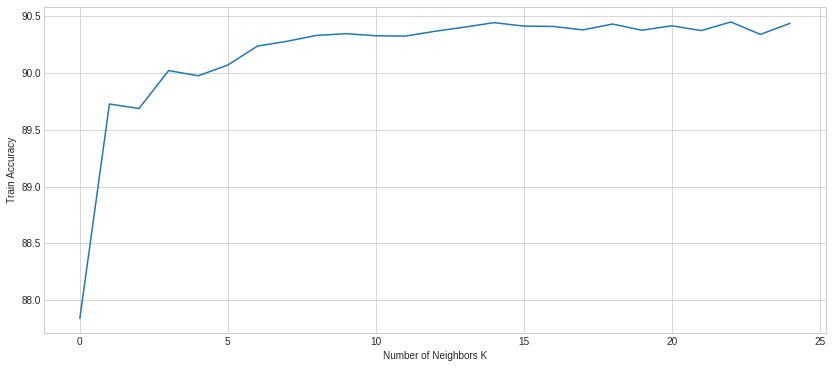

In [216]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_tot,labels, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [584]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10796   182]
 [ 1026   353]]
90.0


In [261]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10091   887]
 [  868   511]]
86.0


In [581]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10221   757]
 [  696   683]]
88.0


In [477]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10549   429]
 [  722   657]]
91.0


In [582]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[9689 1289]
 [ 615  764]]
85.0


In [600]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[[10873   105]
 [ 1124   255]]
90.0


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use

In [586]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', ],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, ]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,XGBoost,0.913427
4,Logistic Model,0.909577
0,Random Forest Classifier,0.909230
3,K-Near Neighbors,0.903298
1,Decision Tree Classifier,0.882488
2,Support Vector Machine,0.855087
5,Gausian NB,0.844577


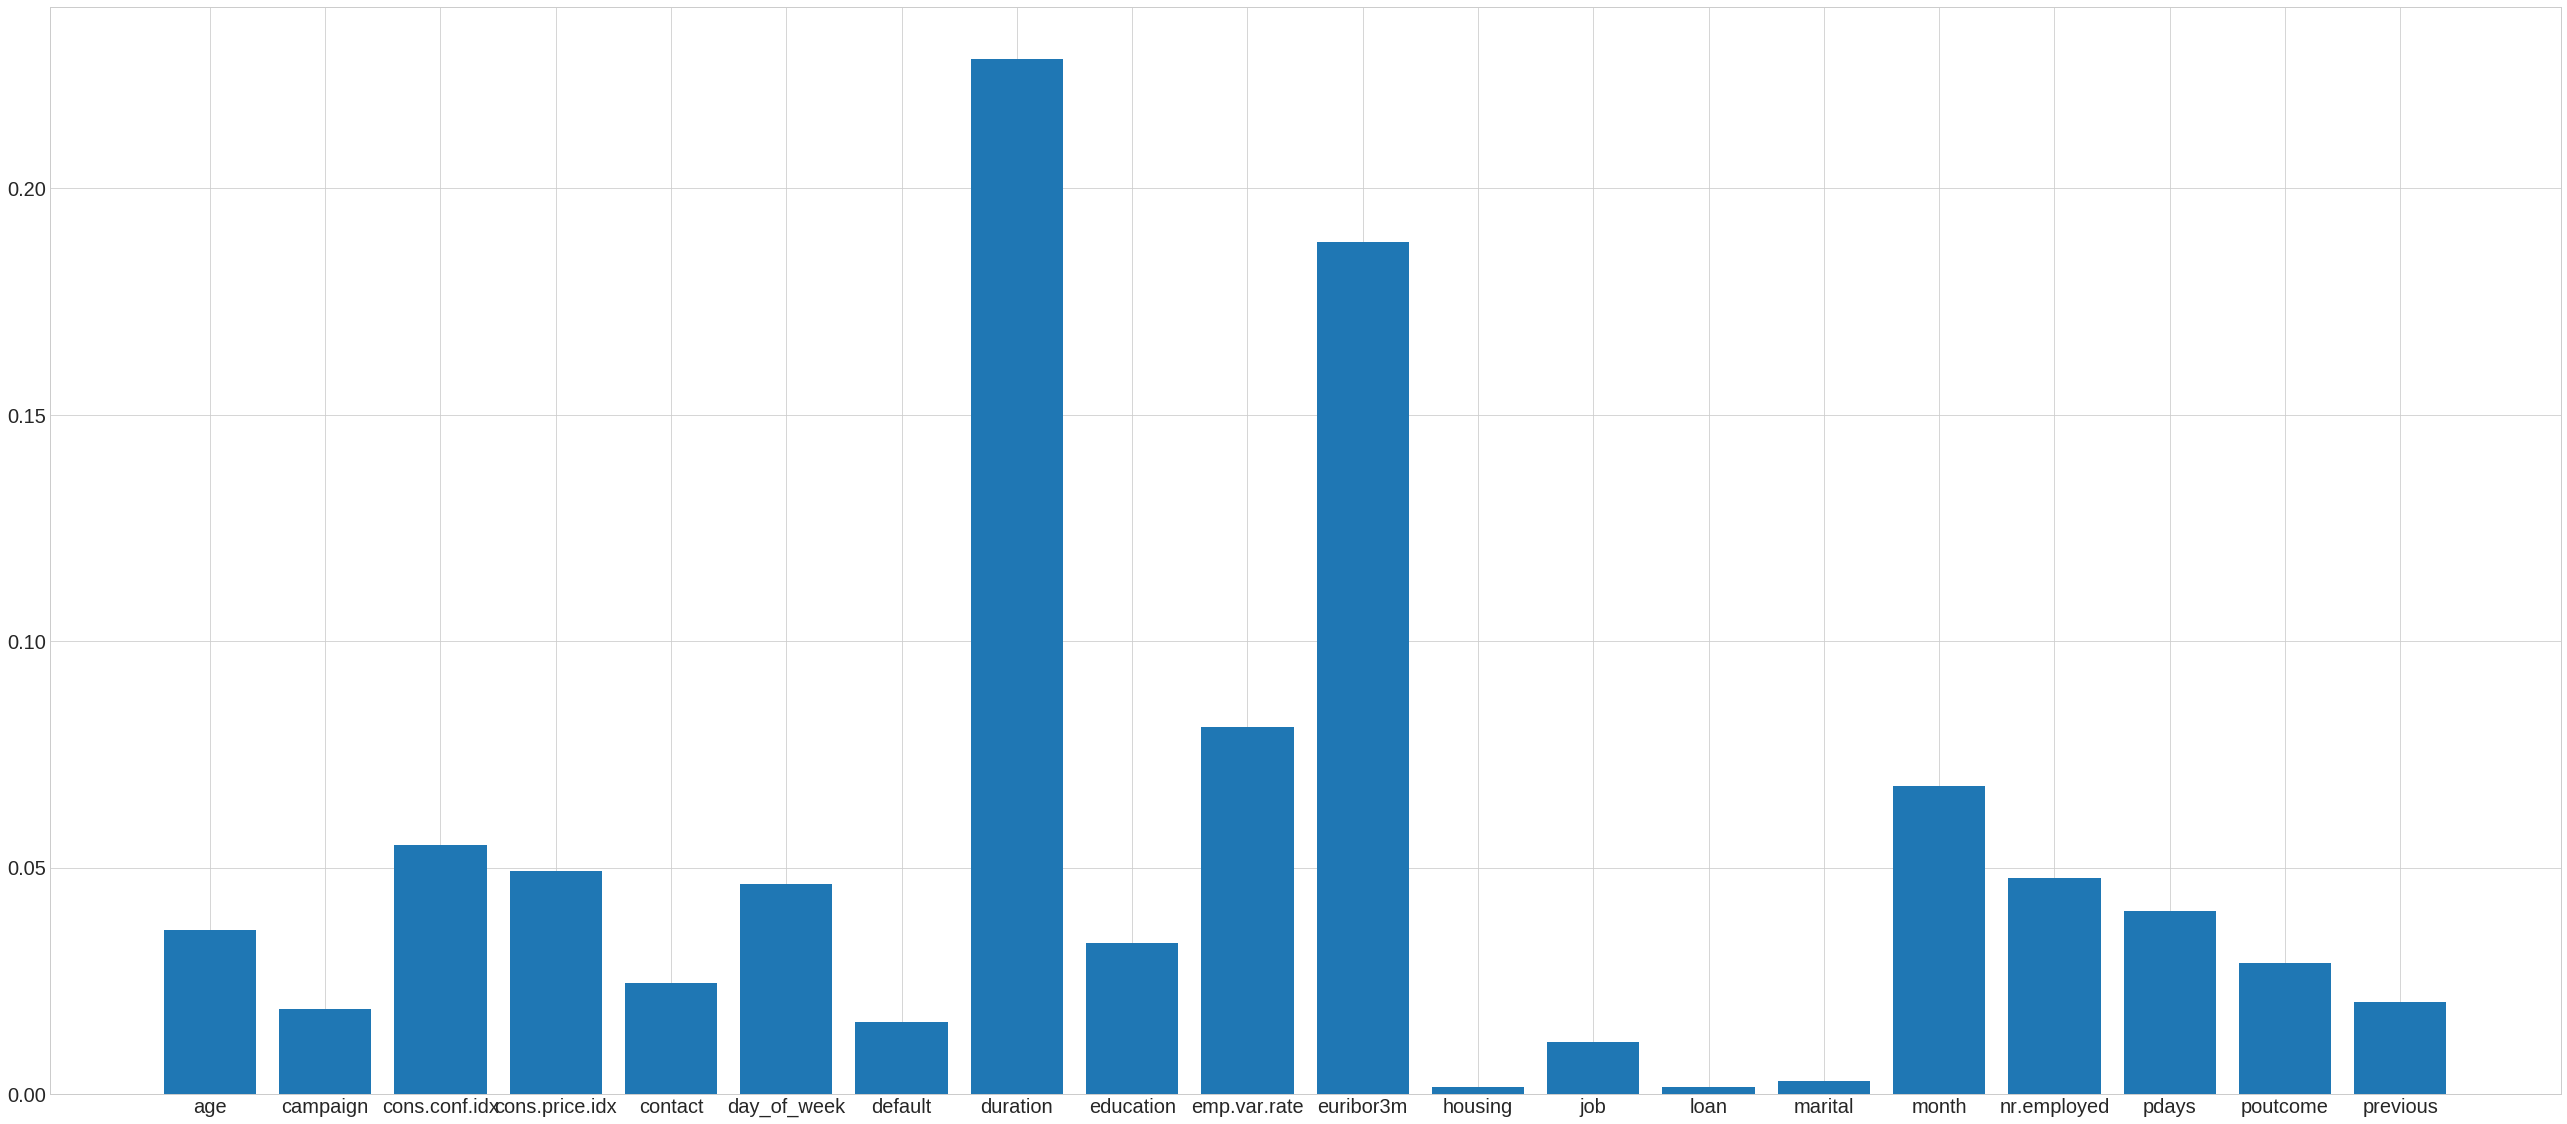

In [303]:

plt.show()

# 밀레니엄세대 TARGET 마케팅

In [231]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [365]:
dataframe =df.copy()

### 밀레니얼

In [349]:
data_age_m[data_age_m.y=='yes'].groupby('age')['campaign'].agg('mean')

age
0    2.053117
1    1.976190
Name: campaign, dtype: float64

In [366]:
def cat_age(dataframe):
    dataframe.loc[(dataframe['age'] <= 36) & (dataframe['age'] > 0) , 'age'] = 0
    dataframe.loc[(dataframe['age'] > 36) , 'age'] = 1
           
    return dataframe

data_age_m = cat_age(dataframe)

In [434]:
data_age_m.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


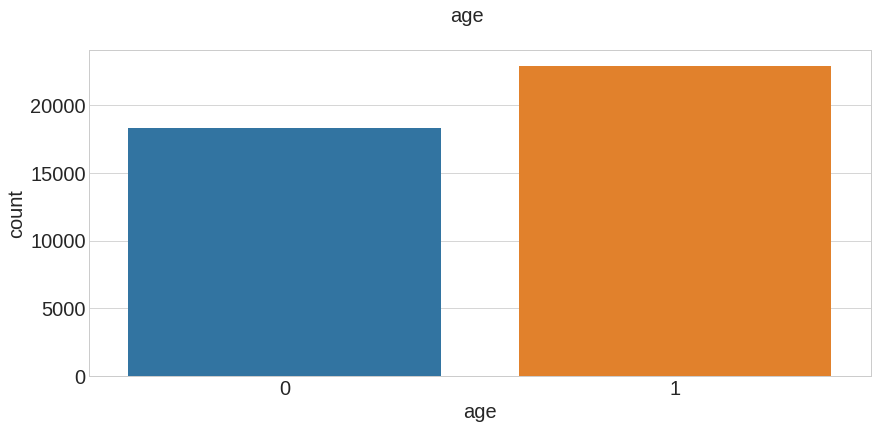

In [373]:
cate_plot('age',data_age_m)

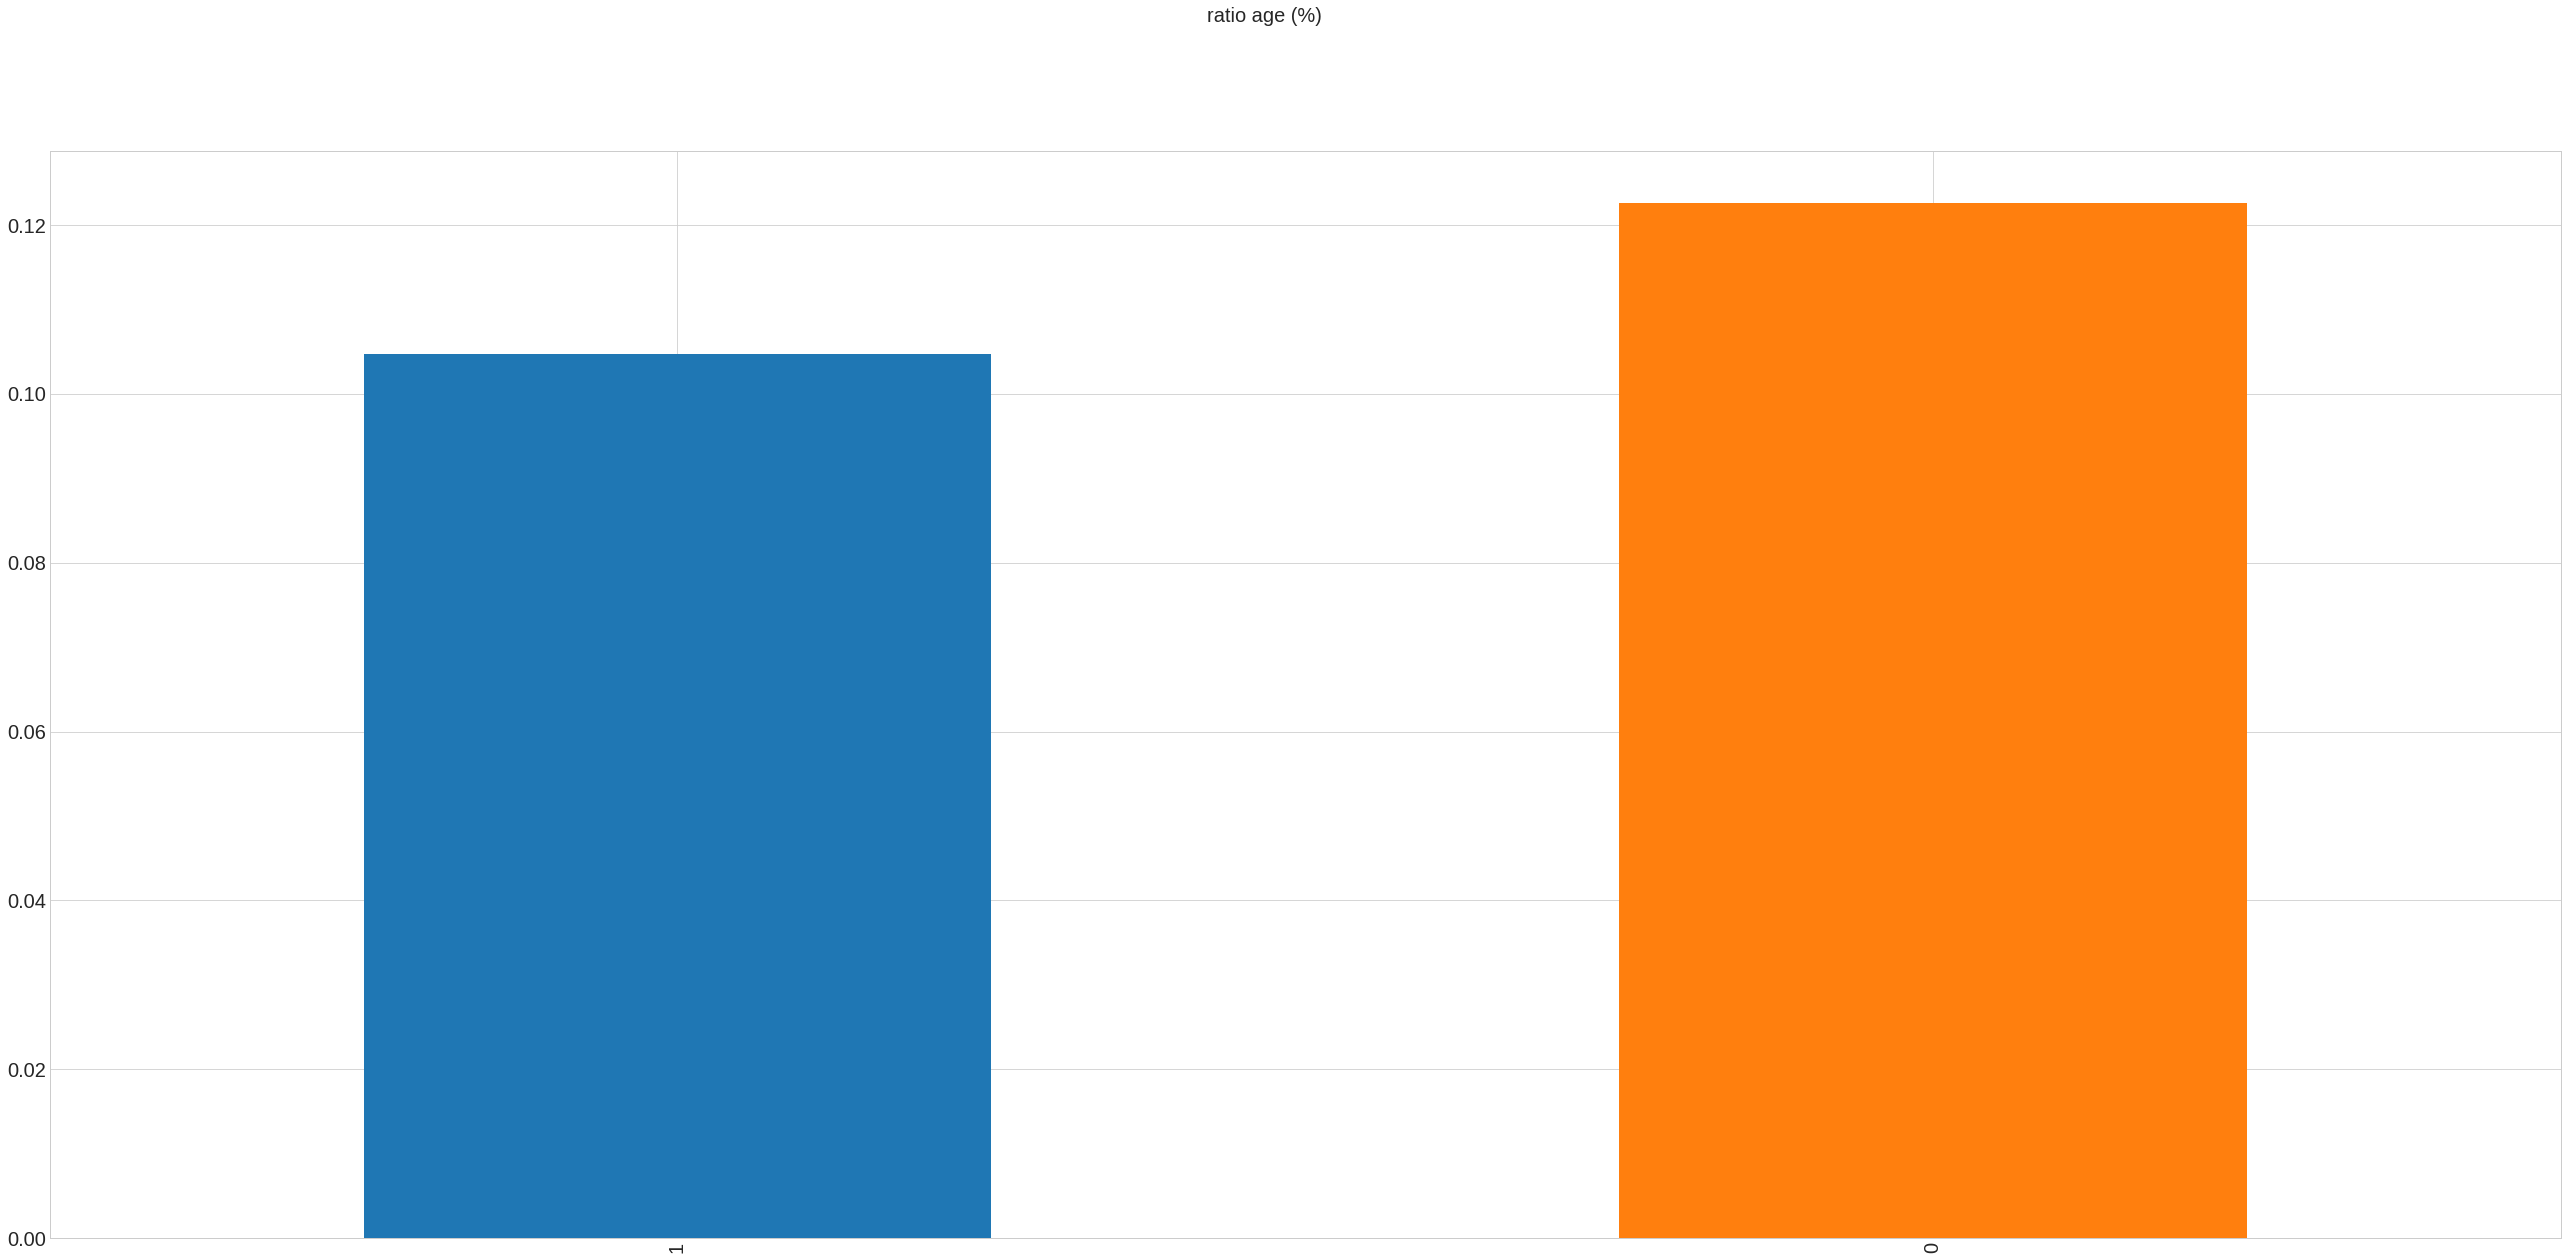

In [372]:
ratio_plot('age',data_age_m)

## 밀레니얼 따로 모델

### Missing data & feature engineering
#### 추론: 데이터 세트에 알 수 없는 변수가 많ek. 손실된 데이터를 처리하는 방법에는 여러 가지가 있다. 그 방법들 중 하나는 행을 버리는 것이지만, 그것은 데이터 세트를 줄일 수 있고 따라서 정확하고 현실적인 예측 모델을 만드는 우리의 목적에 도움이 되지 않는다.
#### 다른 방법은 알 수 없는 변수의 값을 다른 변수에서 현명하게 추론하는 것이다. 이것은 우리가 다른 독립적 변수를 사용하여 결측 변수의 가치를 추론할것이다.
#### 알 수 없거나 누락된 변수는 'education', 'job', 'hosing', 'loan', 'defult', 'marital'이다. 그러나 중요한 것은 'education', ''job', 'hosing', 'loan'이다. '결혼'을 모르는 사람들의 수가 매우 적다. 알 수 없는 '기본값' 변수는 알 수 없는 것으로 기록 고객은 이 정보를 은행 담당자에게 공개하지 않을지도.... 따라서 'unknown'의 알 수 없는 값은 실제로 별도의 값

#### 따라서  'education', 'job', 'hosing', 'loan'에서 알려지지 않은 가치에 대한 새로운 변수를 만드는 것으로 시작한다. 이 작업을 통해 값이 랜덤하게 누락되었는지 또는 누락된 값의 패턴이 있는지 확인할 수 있따

#### 여기서 가설은 '직업'이 한 사람의 '교육'에 의해 영향을 받는다는 것이다. 따라서 개인의 교육을 바탕으로 '직업'을 추론할 수 있다. 그리고 단지 결측값을 채우고 있기 때문에 인과적 추론 필요없???

In [443]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [444]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [445]:

df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

In [446]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [447]:
jobhousing=cross_tab(df,'job','housing')
jobloan=cross_tab(df,'job','loan')

#### 주택과 대출에 대한 인상: 가설은 주택 대출 상태가 각 직업 범주의 비율이어야 한다 각 직종별 주택대출의 분산을 사용하여사람에 대한 주택담보대출은 그대로 유지되도록 예측될 것, 'loan' 변수에서 누락된 값을 채워보자

In [448]:
def fillhousing(df,jobhousing):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [449]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [450]:
df=fillhousing(df,jobhousing)

In [451]:
df=fillloan(df,jobloan)

In [378]:
def make_set(df):
    df_client = df.iloc[: , 0:7]
    labelencoder_X = LabelEncoder()
    df_client['job']      = labelencoder_X.fit_transform(df_client['job']) 
    df_client['marital']  = labelencoder_X.fit_transform(df_client['marital']) 
    df_client['education']= labelencoder_X.fit_transform(df_client['education']) 
    df_client['default']  = labelencoder_X.fit_transform(df_client['default']) 
    df_client['housing']  = labelencoder_X.fit_transform(df_client['housing']) 
    df_client['loan']     = labelencoder_X.fit_transform(df_client['loan']) 
    
    df_related = df.iloc[: , 7:11]
    labelencoder_X = LabelEncoder()
    df_related['contact']     = labelencoder_X.fit_transform(df_related['contact']) 
    df_related['month']       = labelencoder_X.fit_transform(df_related['month']) 
    df_related['day_of_week'] = labelencoder_X.fit_transform(df_related['day_of_week']) 
    
    df_related.loc[df_related['duration'] <= 102, 'duration'] = 1
    df_related.loc[(df_related['duration'] > 102) & (df_related['duration'] <= 180)  , 'duration']    = 2
    df_related.loc[(df_related['duration'] > 180) & (df_related['duration'] <= 319)  , 'duration']   = 3
    df_related.loc[(df_related['duration'] > 319) & (df_related['duration'] <= 644.5), 'duration'] = 4
    df_related.loc[df_related['duration']  > 644.5, 'duration'] = 5
    df_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
   
    df_e = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
   

    df_e['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

    df_tot= pd.concat([df_client, df_related, df_se, df_e], axis = 1)
    df_tot = df_tot[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                         'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                         'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]   
    return df_tot

In [438]:
df_mi = data_age_m[data_age_m.age == 0]
df_nomi = data_age_m[data_age_m.age == 1]

In [439]:
df_mi_y = df_mi["y"].copy()
df_mi   = df_mi.drop("y",axis=1)
df_nomi_y = df_nomi["y"].copy()
df_nomi   = df_nomi.drop("y",axis=1)

In [381]:
df_mi = make_set(df_mi)
df_nomi = make_set(df_nomi)

In [383]:
train, test, train_labels, test_labels = train_test_split(df_nomi, df_nomi_y, test_size=0.3, random_state=1000)
df_nomi_y.replace(['yes', 'no'], [1,0], inplace  = True)
X_train, X_test, y_train, y_test = train_test_split(df_nomi, df_nomi_y, test_size = 0.3, random_state = 101)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6039  137]
 [ 443  250]]
92.0
[[5946  230]
 [ 372  321]]
91.0


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[[6004  172]
 [ 395  298]]
92.0


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use

### Mi

In [384]:
train, test, train_labels, test_labels = train_test_split(df_mi, df_mi_y, test_size=0.3, random_state=1000)
df_mi_y.replace(['yes', 'no'], [1,0], inplace  = True)
X_train, X_test, y_train, y_test = train_test_split(df_mi, df_mi_y, test_size = 0.3, random_state = 101)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[4686  142]
 [ 397  263]]
90.0
[[4636  192]
 [ 352  308]]
90.0


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[[4671  157]
 [ 342  318]]
91.0


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use

### 그룹별

In [ ]:
def cat_age(dataframe):
    dataframe.loc[(dataframe['age'] <= 19) & (dataframe['age'] > 0) , 'age'] = 10
    dataframe.loc[(dataframe['age'] > 19) & (dataframe['age'] <= 29), 'age'] = 20
    dataframe.loc[(dataframe['age'] > 29) & (dataframe['age'] <= 39), 'age'] = 30
    dataframe.loc[(dataframe['age'] > 40) & (dataframe['age'] <= 49), 'age'] = 40
    dataframe.loc[(dataframe['age'] > 49) , 'age'] = 50
           
    return dataframe

data_age = cat_age(dataframe)

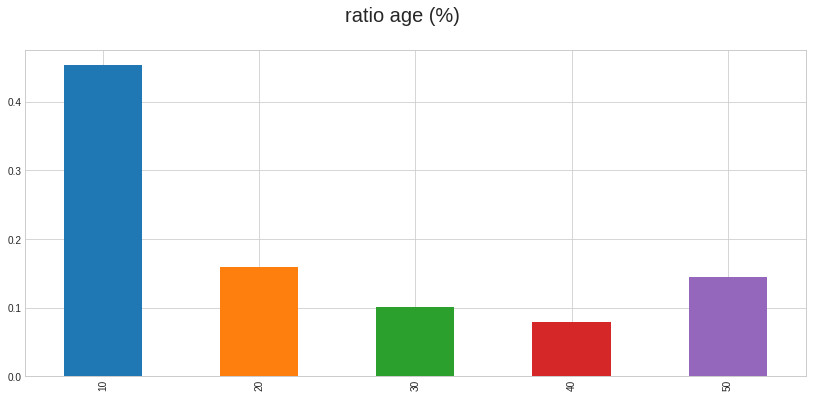

In [259]:
aa = data_age[data_age['y']=='yes']['age'].value_counts()/data_age['age'].value_counts()
plt.suptitle('ratio '+ 'age' +' (%)', fontsize = 20)
aa.plot(kind='bar',stacked=True)

### 좀더 자세히

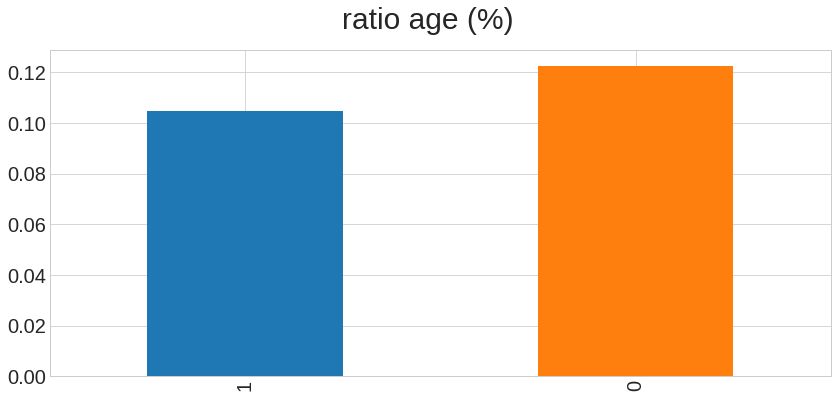

In [374]:
aa = data_age_m[data_age_m['y']=='yes']['age'].value_counts()/data_age_m['age'].value_counts()
plt.suptitle('ratio '+ 'age' +' (%)', fontsize = 30)
plt.rcParams['font.size'] = 20
aa.plot(kind='bar',stacked=True)

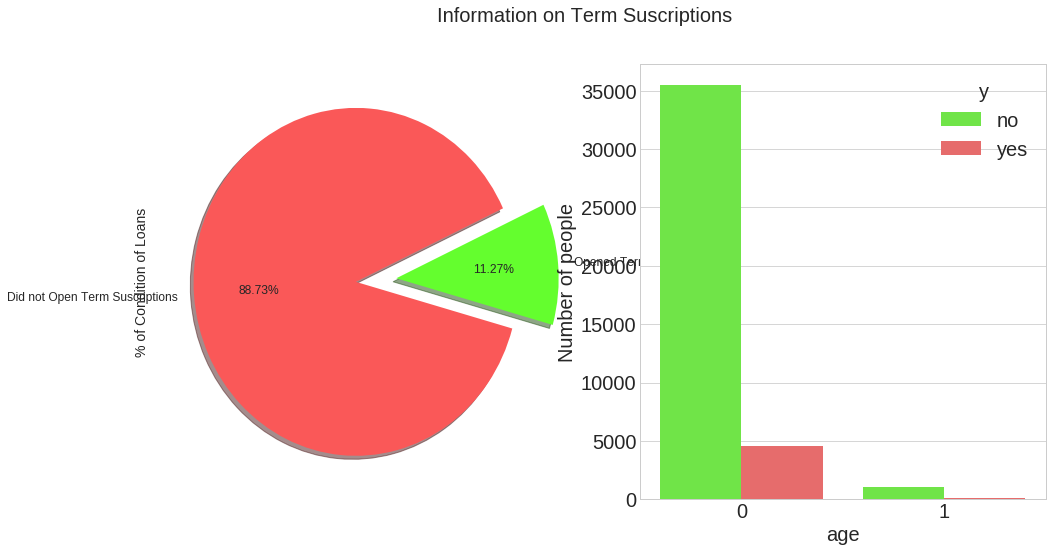

In [345]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

data_age_m["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.countplot(x="age",  hue="y", data=data_age_m, palette=palette)
ax[1].set(ylabel="Number of people")
ax[1].set_xticklabels(data_age_m["age"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

### 밀레니얼 세대중에 정기 예금 개설한 사람들의 특징

In [487]:
df_check = data_age_m[data_age_m.y=='yes']
df_check1 = data_age_m[data_age_m.y=='no']

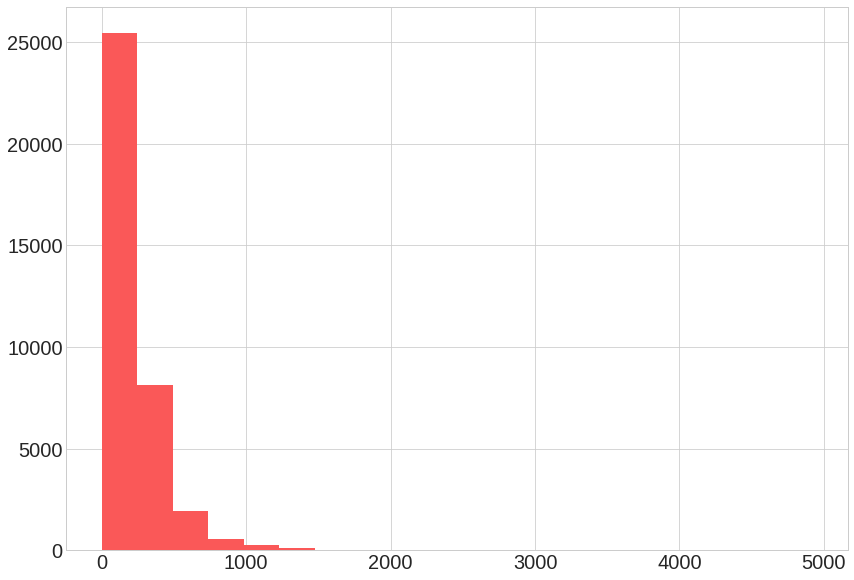

In [488]:
df_check1.duration.hist(bins=20, figsize=(14,10), color="#FA5858")
plt.show()

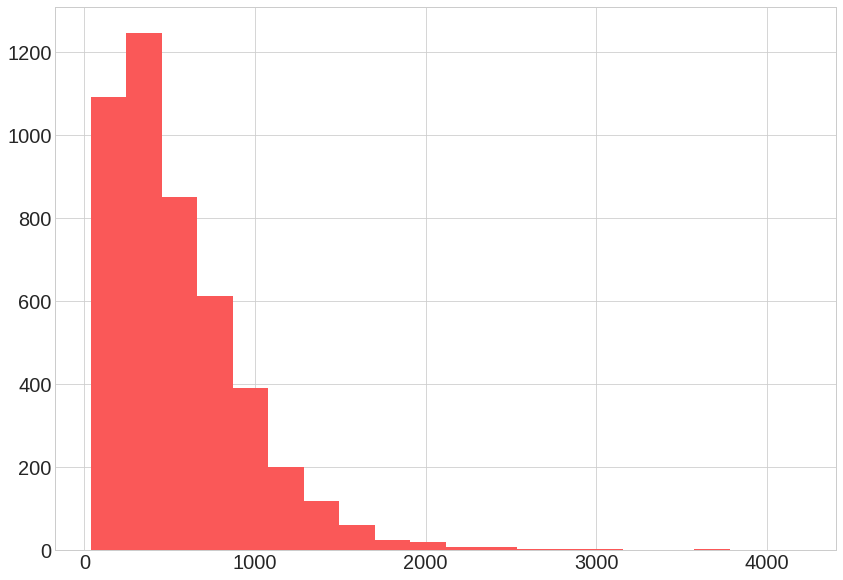

In [486]:
df_check.duration.hist(bins=20, figsize=(14,10), color="#FA5858")
plt.show()

In [395]:
def check_yes(t):
    fig = plt.subplots(figsize=(12,8))
    sns.countplot(data=df_check, x='age',hue=t)
    plt.show()

In [495]:
df_check.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,1,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,1,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,1,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,1,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,1,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


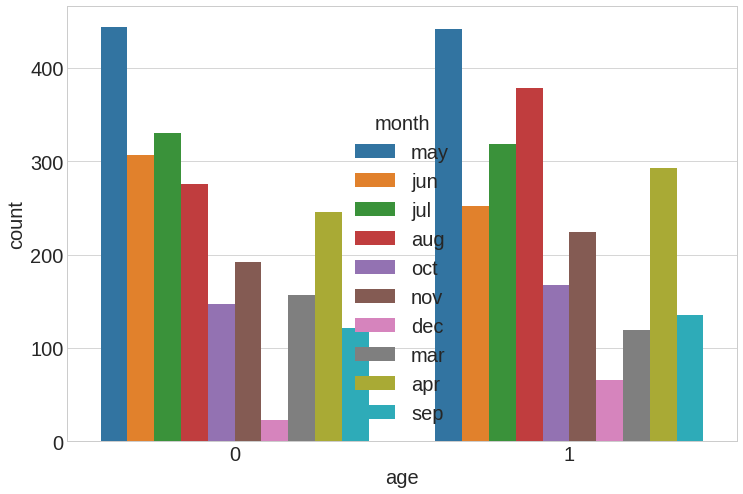

In [396]:
check_yes('month')

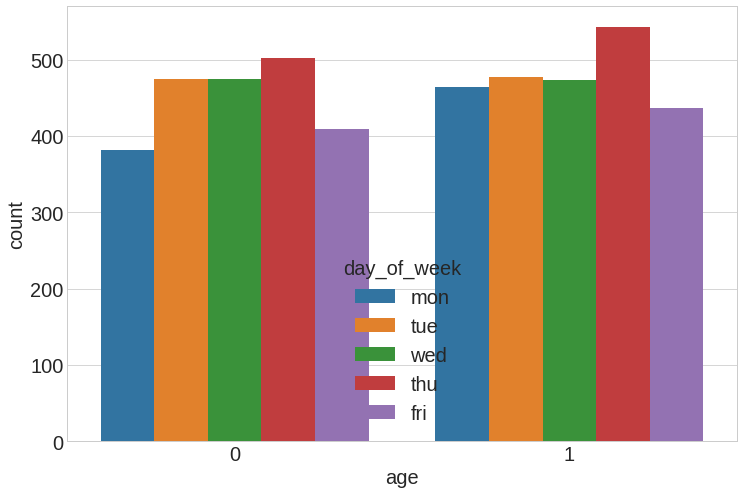

In [397]:
check_yes('day_of_week')

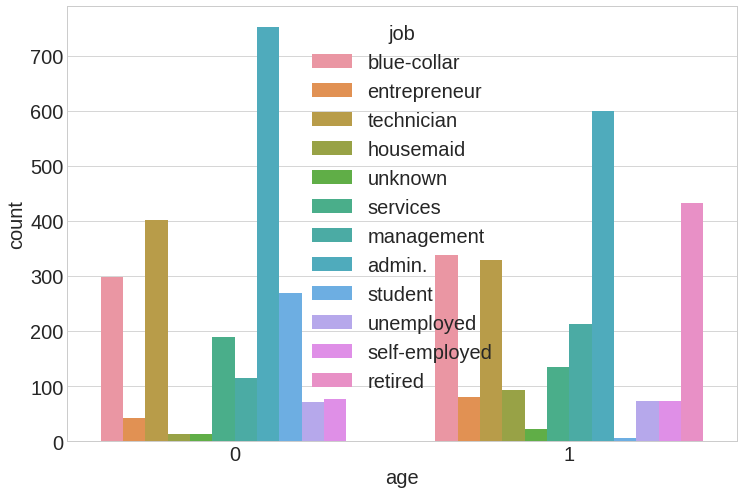

In [393]:
fig = plt.subplots(figsize=(12,8))
sns.countplot(data=df_check, x='age',hue='job')
plt.show()

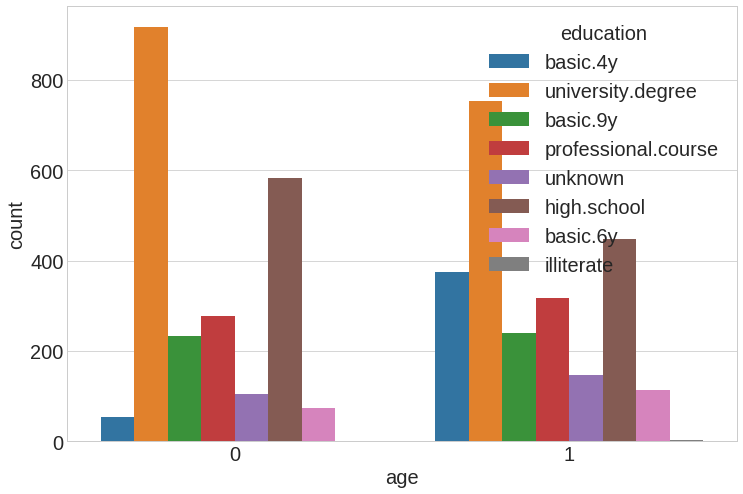

In [394]:
fig = plt.subplots(figsize=(12,8))
sns.countplot(data=df_check, x='age',hue='education')
plt.show()

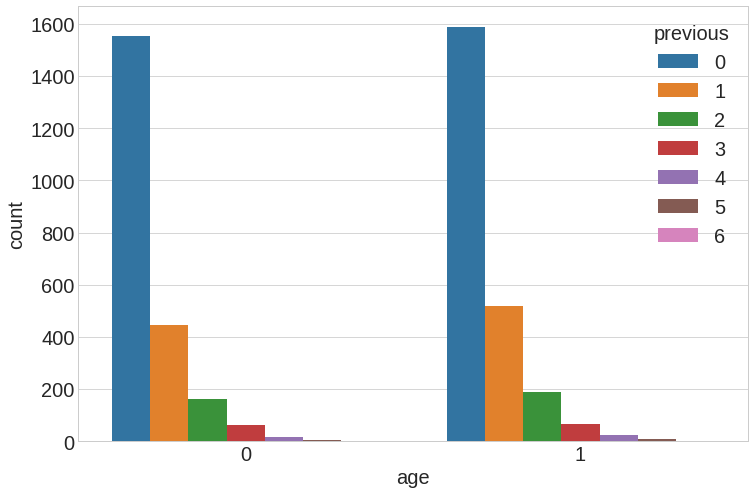

In [401]:
check_yes('previous')

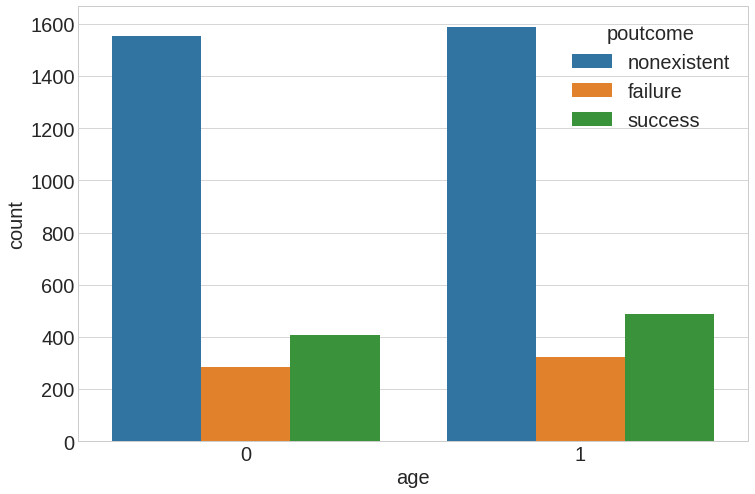

In [403]:
check_yes('poutcome')

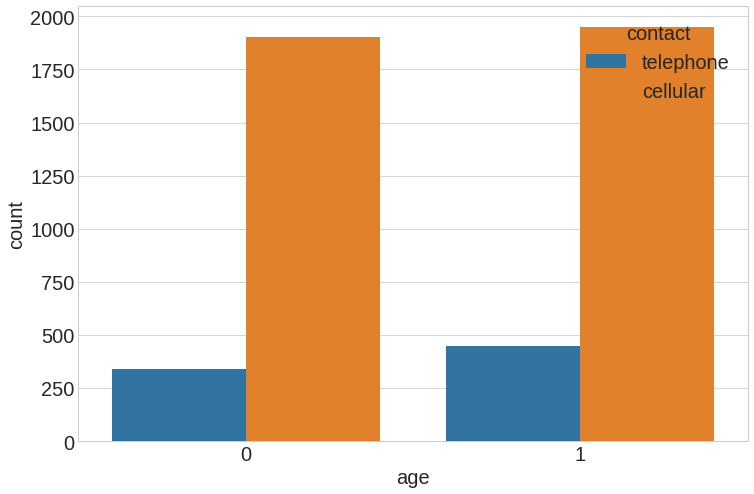

In [408]:
check_yes('contact')

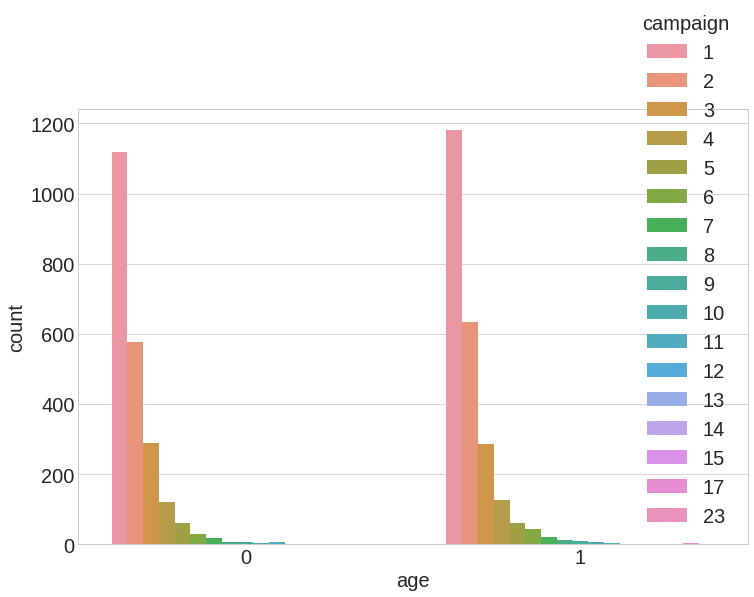

In [406]:
check_yes('campaign')

In [409]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [410]:
num_cluster= 5
plt.figure()